Imports

In [53]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Load the basic dataset, and count how many different classes of fonts there are

In [54]:
dataset_path = "fonts"

# Count the number of fonts that are present in the 'font' folder
fonts = os.listdir(dataset_path)
print(f"Number of fonts in {dataset_path} folder: ", len(fonts))

# List the fonts name
print("Fonts name:", fonts)

Number of fonts in fonts folder:  15
Fonts name: ['Algerian', 'Arial', 'Baskerville', 'Calibry', 'Calligraphy', 'Cambria', 'Comic Sans MS', 'Courier', 'Elephant', 'Fascinate', 'Georgia', 'Helvetica', 'Lucida Bright', 'Nasalization', 'Times New Roman']


List the number of images per font

In [55]:
for font in fonts:
    print(f"Number of images in {dataset_path}/{font}:", len(os.listdir(os.path.join(dataset_path, font))))

Number of images in fonts/Algerian: 1000
Number of images in fonts/Arial: 1000
Number of images in fonts/Baskerville: 1000
Number of images in fonts/Calibry: 1000
Number of images in fonts/Calligraphy: 1000
Number of images in fonts/Cambria: 1000
Number of images in fonts/Comic Sans MS: 1000
Number of images in fonts/Courier: 1000
Number of images in fonts/Elephant: 1000
Number of images in fonts/Fascinate: 1000
Number of images in fonts/Georgia: 1000
Number of images in fonts/Helvetica: 1000
Number of images in fonts/Lucida Bright: 1000
Number of images in fonts/Nasalization: 1000
Number of images in fonts/Times New Roman: 1000


Let's take a look at the different image size in all of the different fonts, using histograms

In [56]:
def compute_histograms(data, title, xlabel, ylabel):
    plt.hist(data, bins=30, color='blue', edgecolor= 'black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

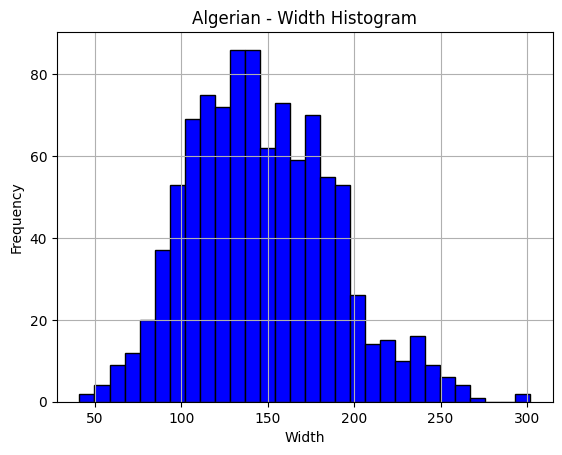

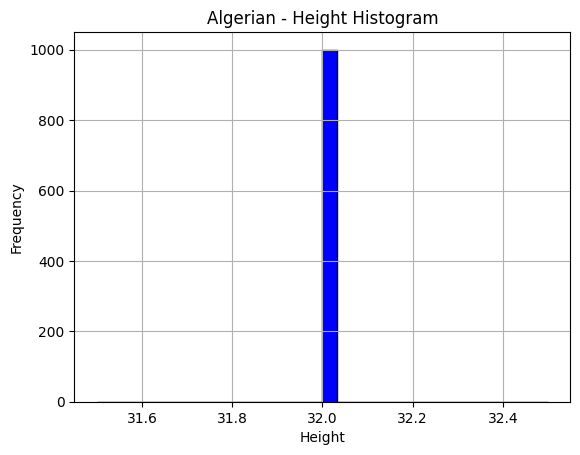

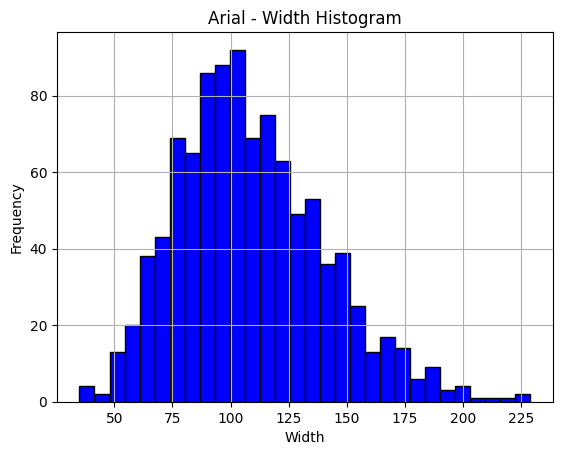

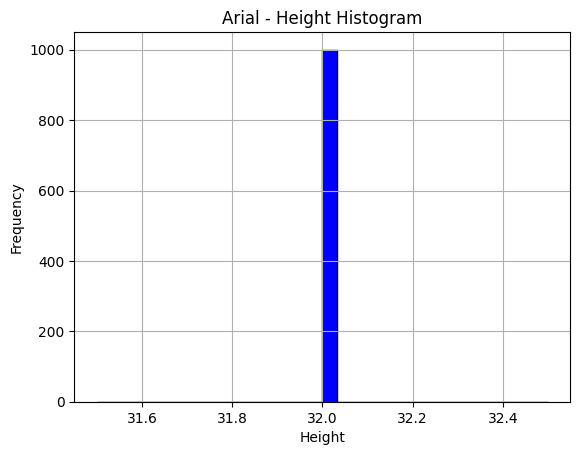

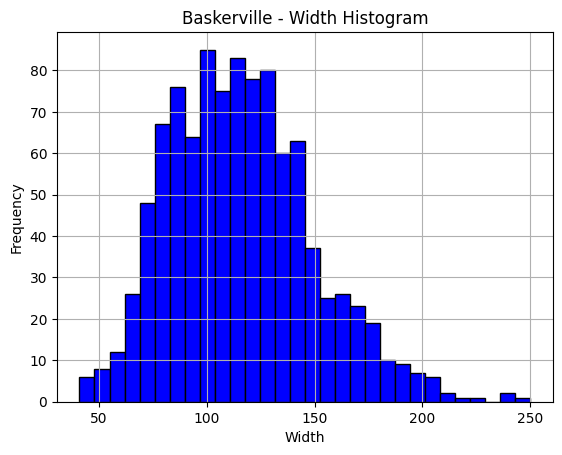

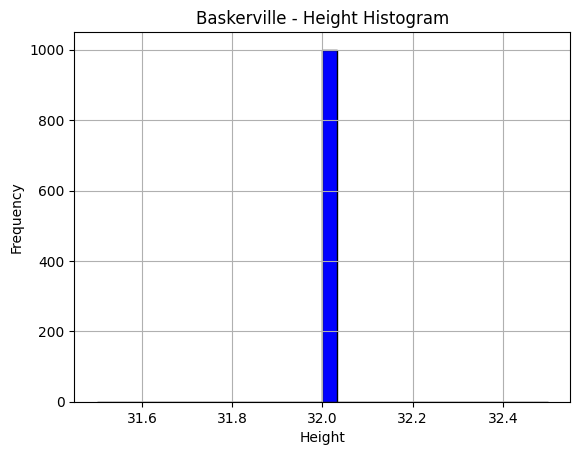

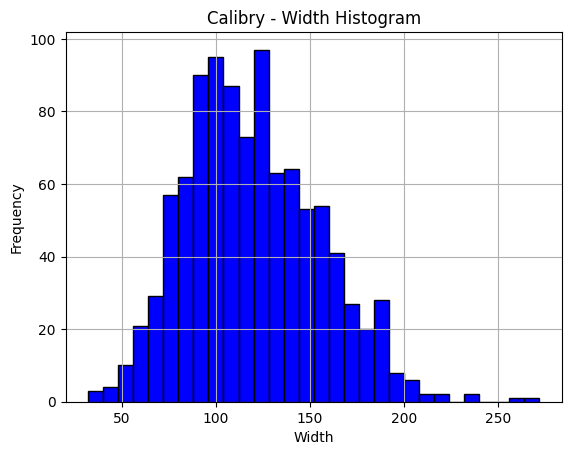

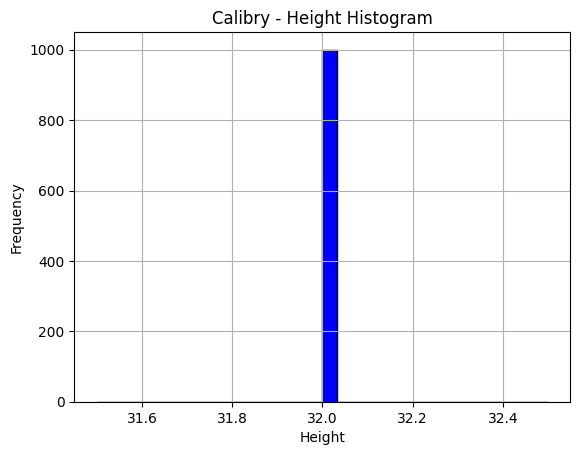

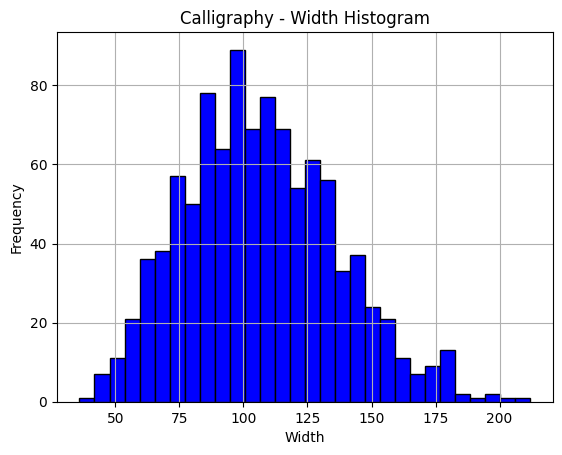

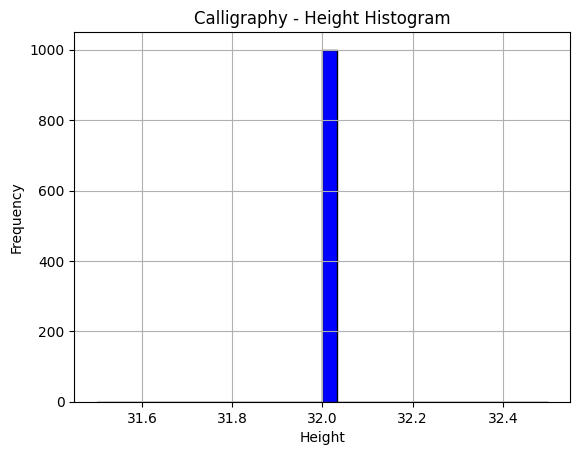

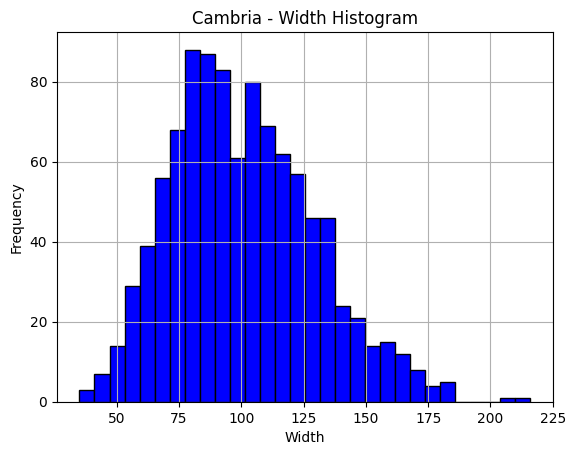

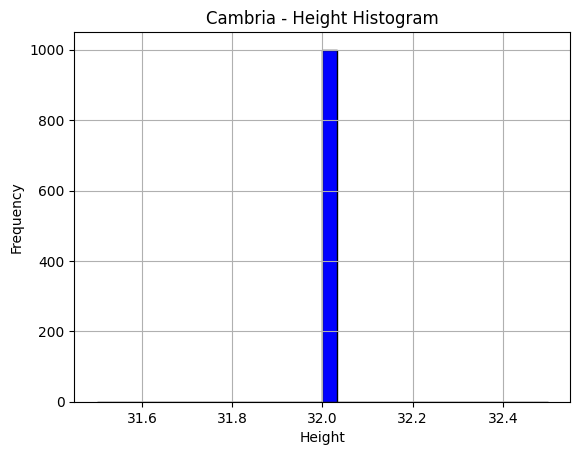

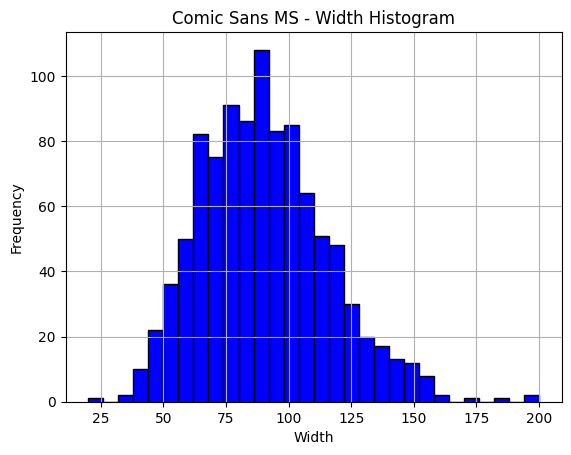

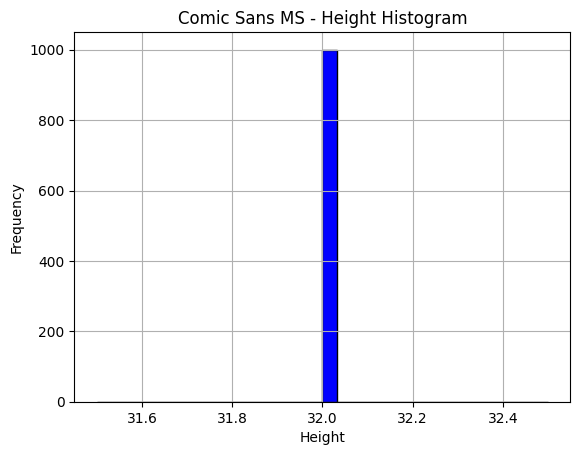

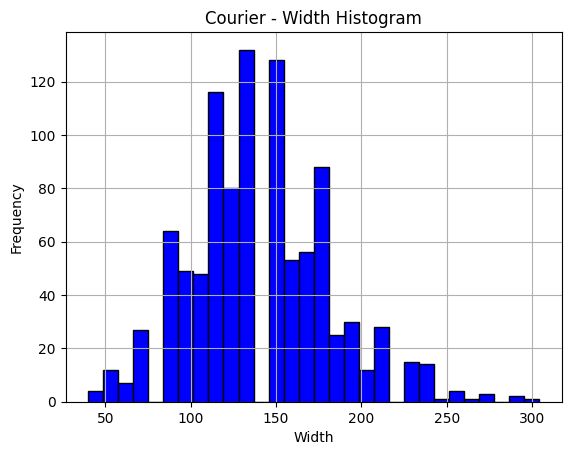

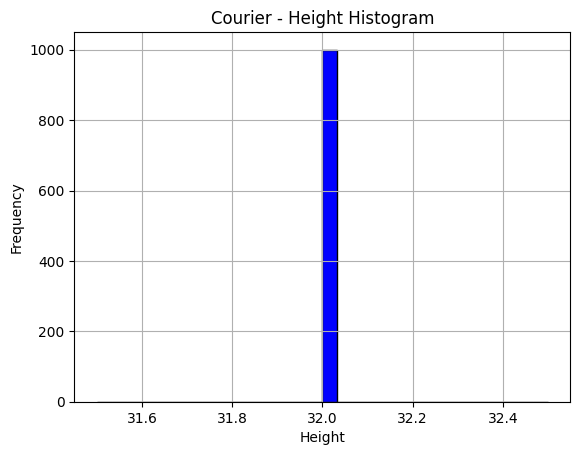

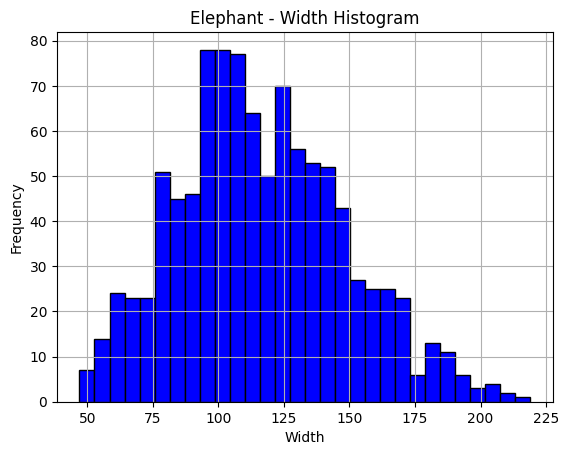

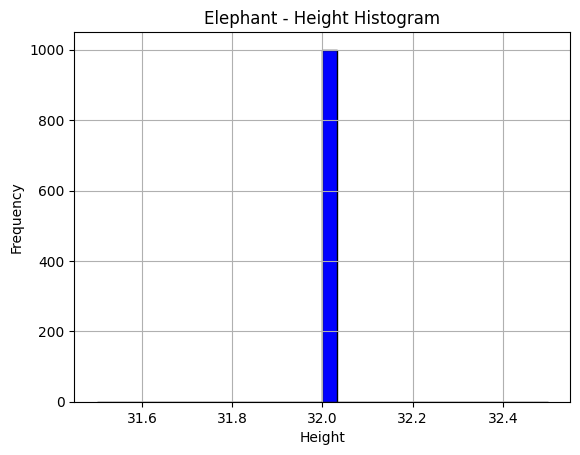

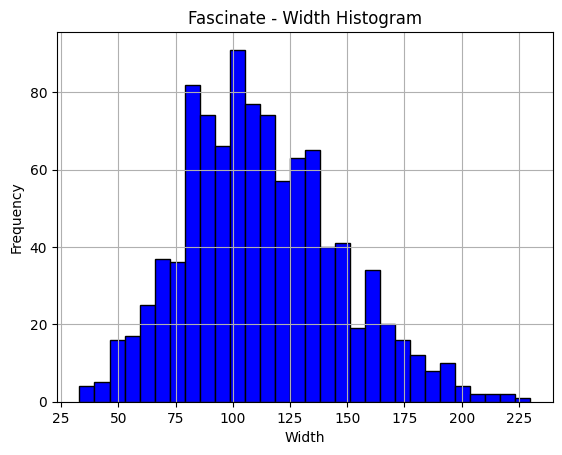

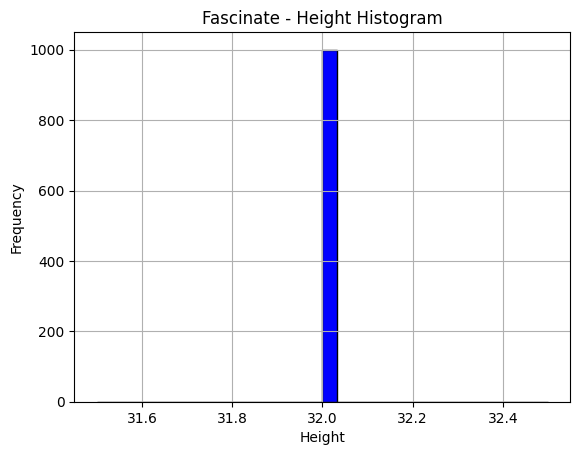

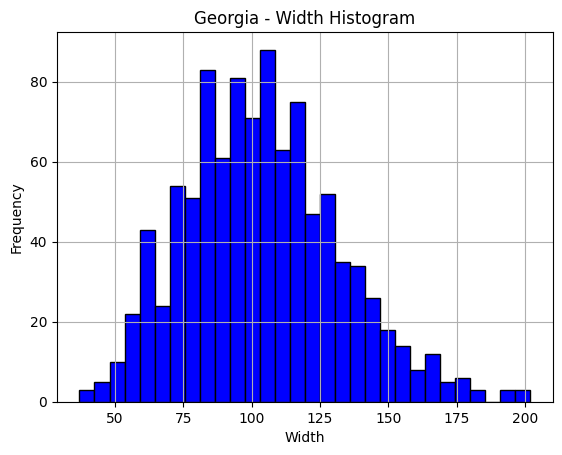

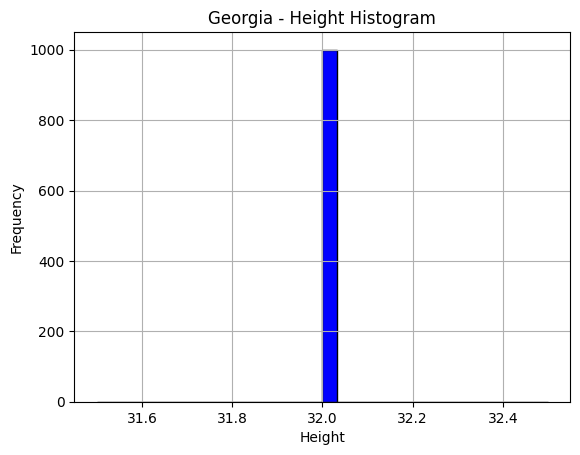

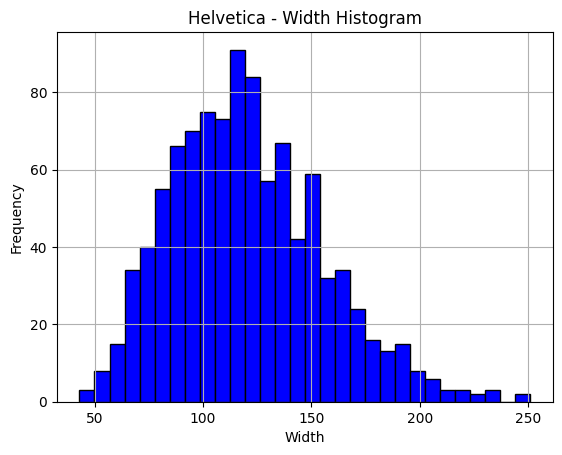

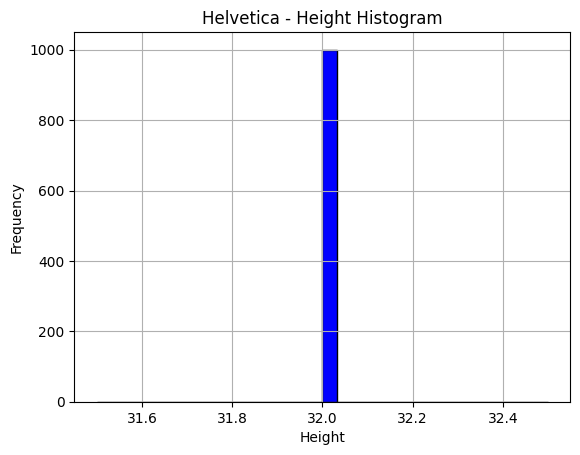

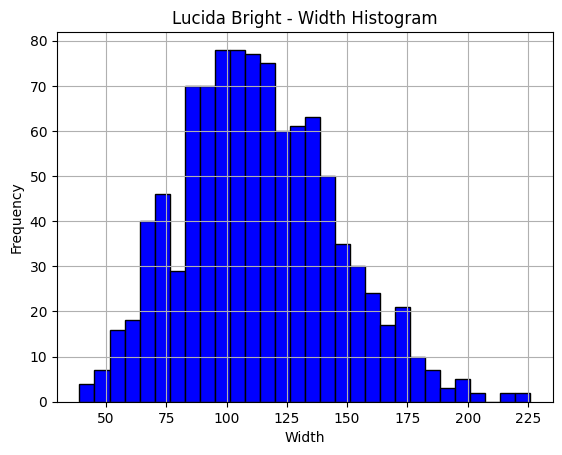

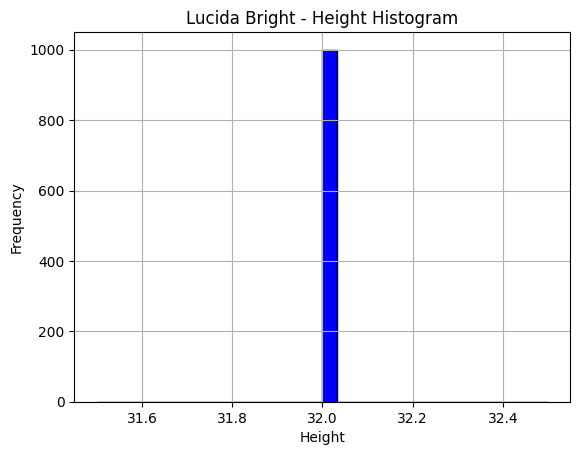

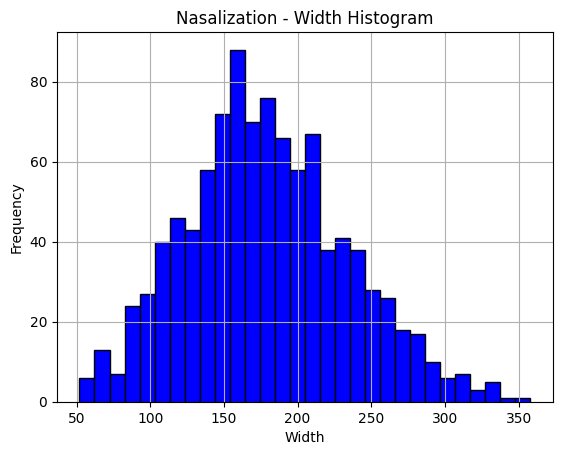

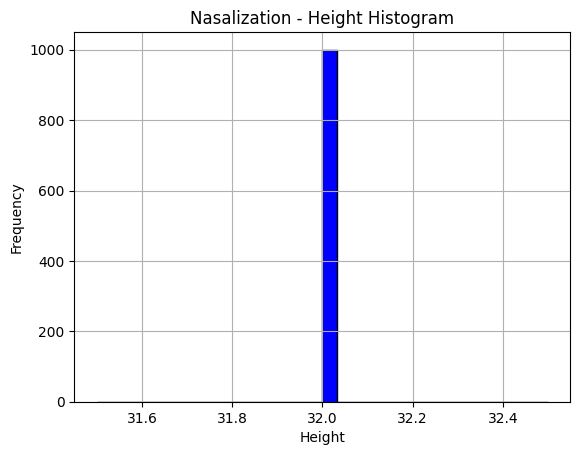

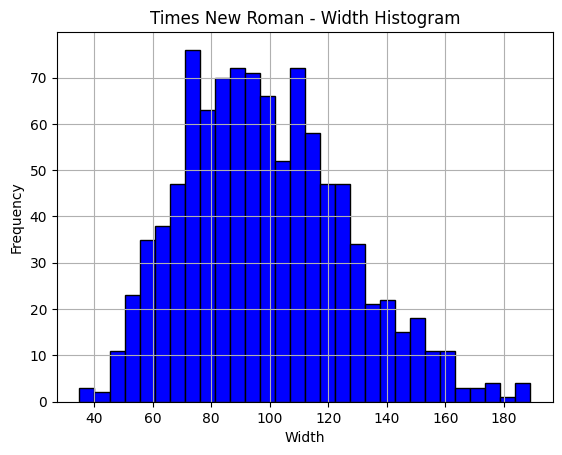

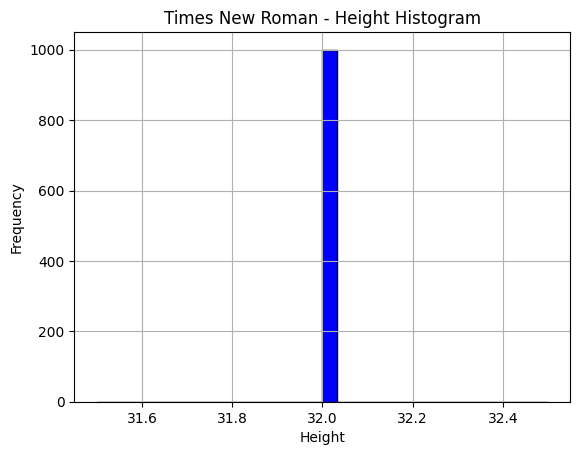

In [57]:
for font in fonts:
    widths = []
    heights = []
    
    path = os.path.join(dataset_path, font)
    images = os.listdir(path)
    for image_name in images:
        image = cv.imread(os.path.join(path, image_name))
        if image is not None:
            height, width, _ = image.shape
            widths.append(width)
            heights.append(height)
        
    compute_histograms(widths, font + " - Width Histogram", "Width", "Frequency")
    compute_histograms(heights, font + " - Height Histogram", "Height", "Frequency")

From the histograms we can see that the height is always the same for each font, with a value of `32`, so we can just compute the histograms of the width.

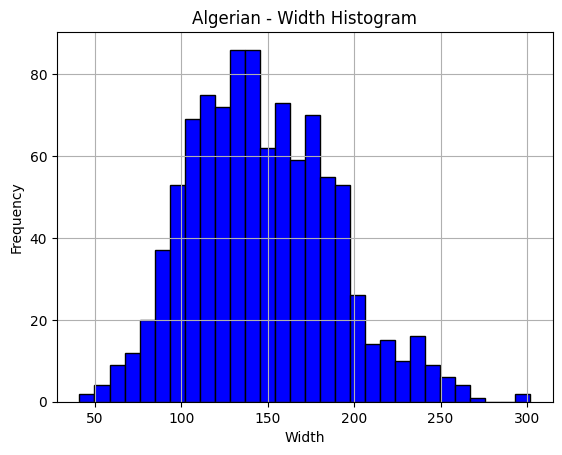

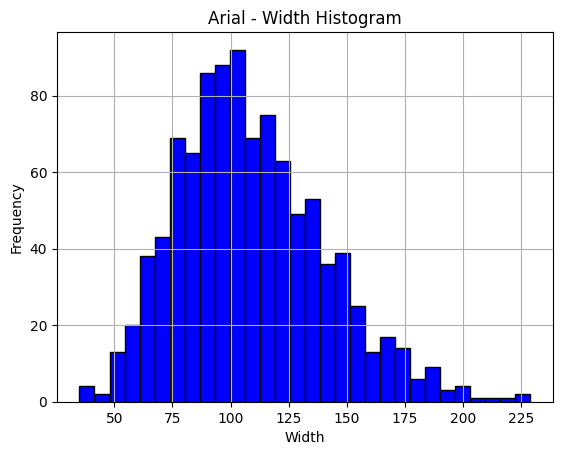

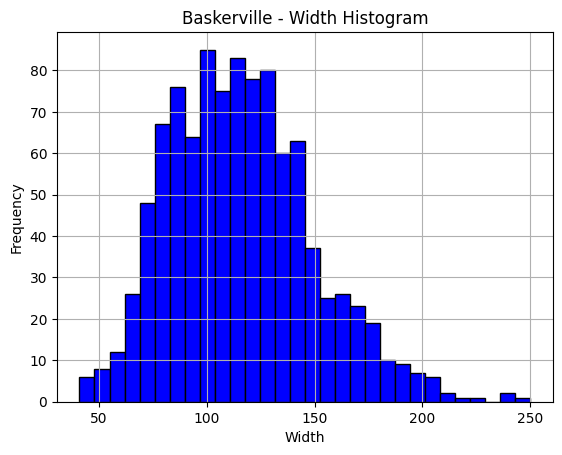

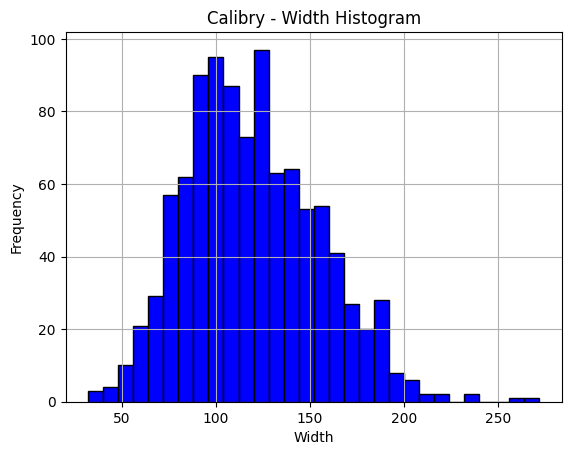

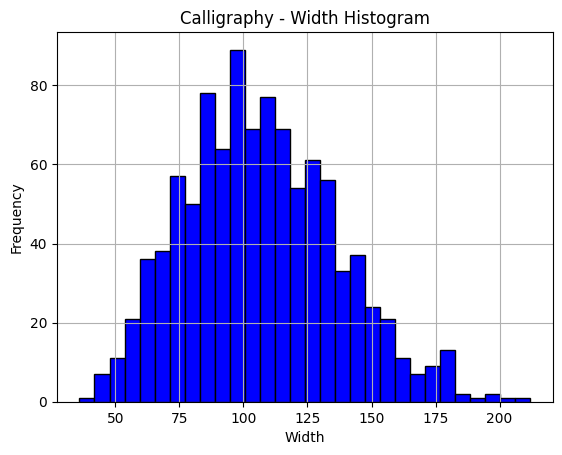

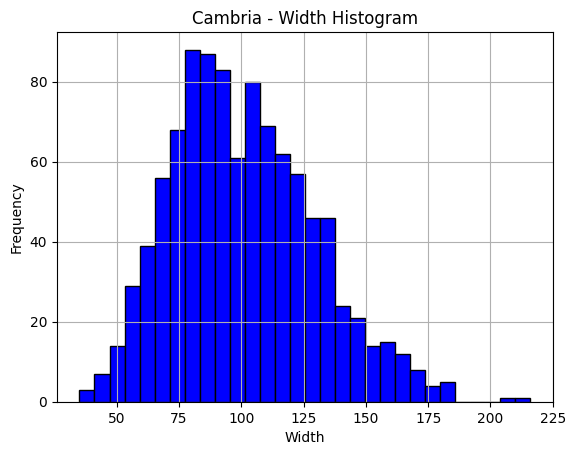

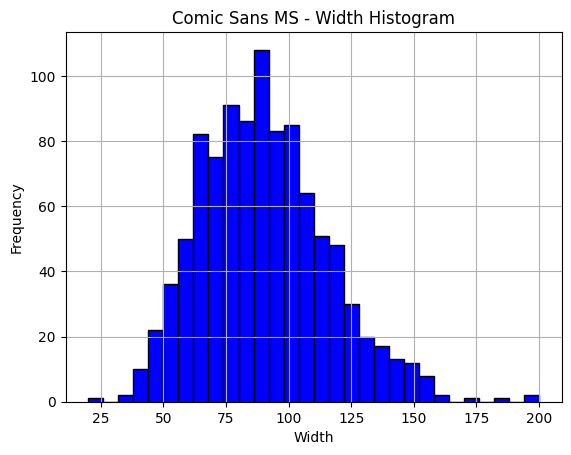

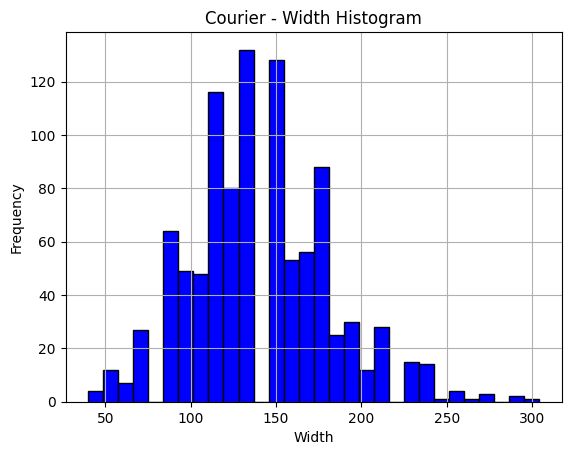

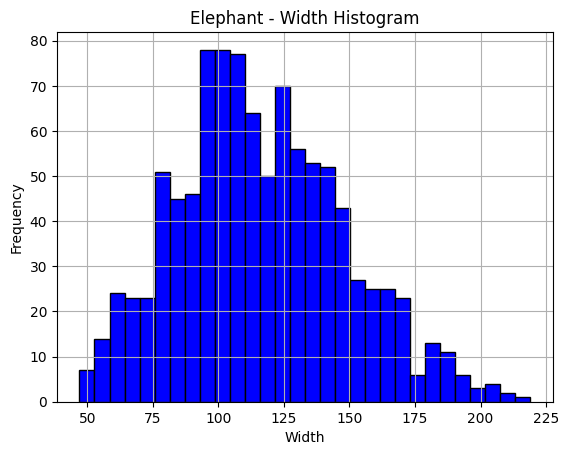

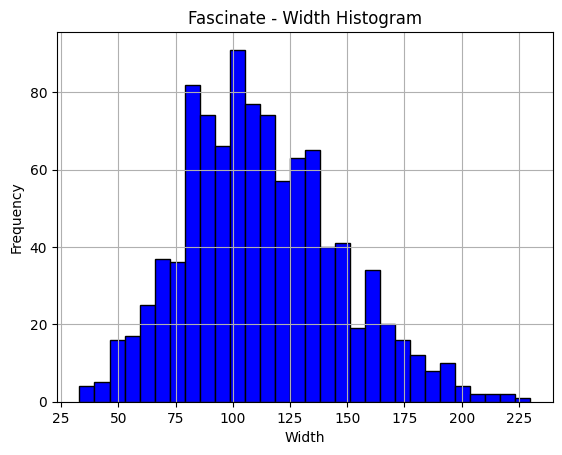

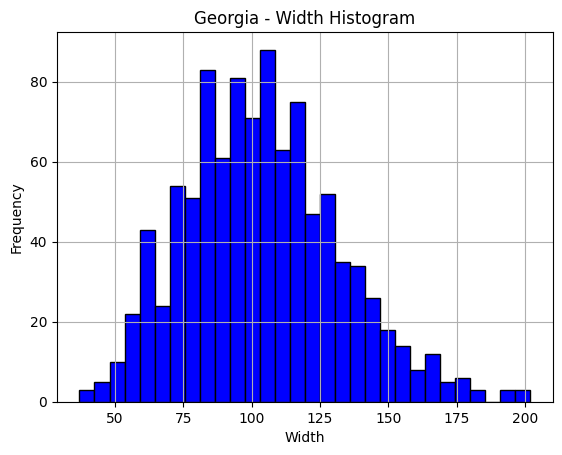

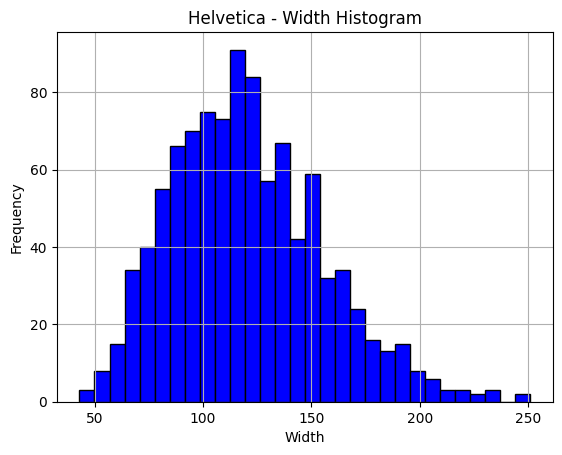

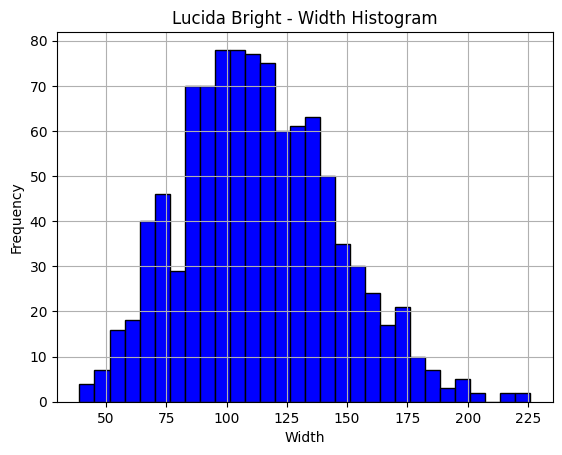

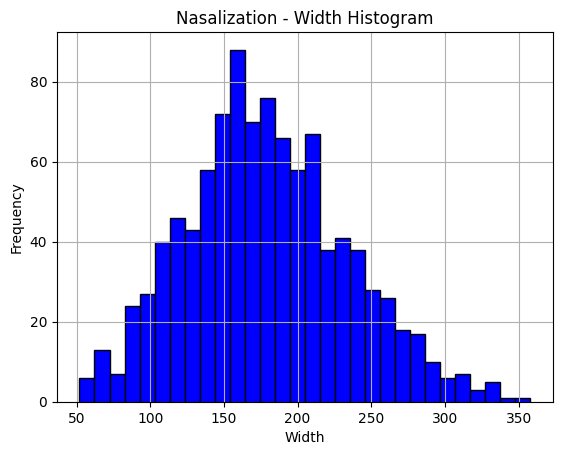

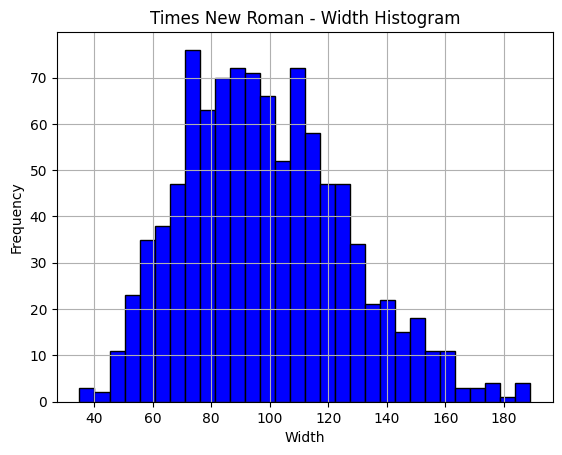

In [58]:
all_widths = []

for font in fonts:
    widths = []
    heights = []
    
    path = os.path.join(dataset_path, font)
    images = os.listdir(path)
    for image_name in images:
        image = cv.imread(os.path.join(path, image_name))
        if image is not None:
            height, width, _ = image.shape
            widths.append(width)
            heights.append(height)
    
    all_widths.append(widths)
    
    compute_histograms(widths, font + " - Width Histogram", "Width", "Frequency")

We can also combine all the widths of all fonts into a single histogram

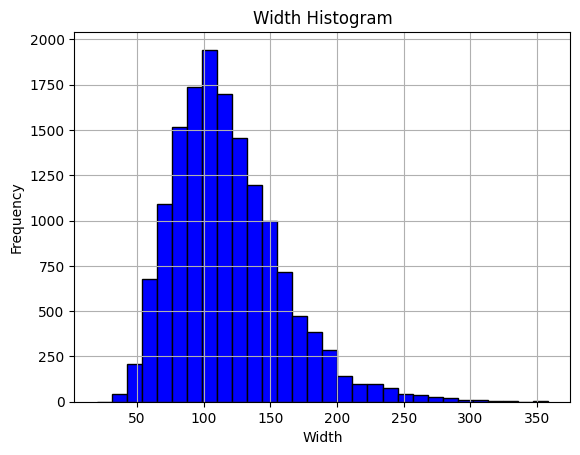

In [59]:
all_widths = np.concatenate(all_widths).tolist()
compute_histograms(all_widths, "Width Histogram", "Width", "Frequency")